<a href="https://colab.research.google.com/github/skshivam789/ML-Projects/blob/master/Wine_Classification_From_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# loading data

In [0]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [0]:
%cp Knight_ML_Assignment.zip /content/

In [0]:
%cd /content/

/content


In [0]:
! unzip Knight_ML_Assignment.zip

Archive:  Knight_ML_Assignment.zip
   creating: Knight ML Assignment/Data/
  inflating: Knight ML Assignment/Data/test.csv  
  inflating: Knight ML Assignment/Data/train.csv  


In [0]:
# importing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

In [0]:
data = pd.read_csv('Knight ML Assignment/Data/train.csv')

In [0]:
test_data = pd.read_csv('Knight ML Assignment/Data/test.csv')


# Data analysis and Preprocessing

In [0]:
data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,NaN,Australia,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Peace Family Vineyard,83,10.0,Australia Other,South Eastern Australia,NaN,Andrew Peace,Chardonnay
1,@wawinereport,US,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,NaN,89,15.0,Washington,Columbia Valley (WA),Columbia Valley,North by Northwest,Red Blend
2,NaN,Italy,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Conca,94,80.0,Piedmont,Barolo,NaN,Renato Ratti,Nebbiolo
3,@vossroger,France,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,L'Abbaye,87,22.0,Southwest France,Bergerac Sec,NaN,Domaine l'Ancienne Cure,Bordeaux-style White Blend
4,@vossroger,France,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Le Cèdre Vintage,88,33.0,France Other,Vin de Liqueur,NaN,Château du Cèdre,Malbec


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82657 entries, 0 to 82656
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           63264 non-null  object 
 1   country             82622 non-null  object 
 2   review_title        82657 non-null  object 
 3   review_description  82657 non-null  object 
 4   designation         59010 non-null  object 
 5   points              82657 non-null  int64  
 6   price               77088 non-null  float64
 7   province            82622 non-null  object 
 8   region_1            69903 non-null  object 
 9   region_2            35949 non-null  object 
 10  winery              82657 non-null  object 
 11  variety             82657 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 7.6+ MB


In [0]:
data['variety'].value_counts()

Pinot Noir                    10587
Chardonnay                     9403
Cabernet Sauvignon             7552
Red Blend                      7166
Bordeaux-style Red Blend       5497
Riesling                       4148
Sauvignon Blanc                4011
Syrah                          3316
Rosé                           2831
Merlot                         2471
Nebbiolo                       2242
Zinfandel                      2209
Sangiovese                     2165
Malbec                         2119
Portuguese Red                 1969
White Blend                    1896
Sparkling Blend                1739
Tempranillo                    1448
Rhône-style Red Blend          1182
Pinot Gris                     1148
Champagne Blend                1133
Cabernet Franc                 1095
Grüner Veltliner               1055
Portuguese White                896
Pinot Grigio                    873
Bordeaux-style White Blend      850
Gewürztraminer                  840
Gamay                       

In [0]:
# selecting only the required columns
reviews = data[['review_title','review_description','variety']]

In [0]:
reviews.head()

,review_title,review_description,variety
0,Andrew Peace 2007 Peace Family Vineyard Chardo...,"Classic Chardonnay aromas of apple, pear and h...",Chardonnay
1,North by Northwest 2014 Red (Columbia Valley (...,This wine is near equal parts Syrah and Merlot...,Red Blend
2,Renato Ratti 2007 Conca (Barolo),Barolo Conca opens with inky dark concentratio...,Nebbiolo
3,Domaine l'Ancienne Cure 2010 L'Abbaye White (B...,It's impressive what a small addition of Sauvi...,Bordeaux-style White Blend
4,Château du Cèdre 2012 Le Cèdre Vintage Malbec ...,"This ripe, sweet wine is rich and full of drie...",Malbec


In [0]:
reviews['review_description'][0]

'Classic Chardonnay aromas of apple, pear and hay lead into a palate marked by decent intensity but also a bit of sweetness. Orange and candy notes run through the rather short finish.'

In [0]:
reviews['review_title'][0]

'Andrew Peace 2007 Peace Family Vineyard Chardonnay (South Eastern Australia)'

we need to remove the symbols such as  ','  and  '.'  from the text

In [0]:
# regular expression for removing symbols from text
replace = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\%)|(\-)")

In [0]:
# function to remove symbols from the text
def clean_text(data) :
  data_cleaned = [replace.sub("", line.lower()) for line in data]
  return data_cleaned

In [0]:
reviews['review_description'] = clean_text(reviews['review_description'])

now we can see the symbols have been removed from text

In [0]:
reviews['review_description'][0]

'classic chardonnay aromas of apple pear and hay lead into a palate marked by decent intensity but also a bit of sweetness orange and candy notes run through the rather short finish'

In [0]:
reviews['review_title'] = clean_text(reviews['review_title'])

In [0]:
reviews['review_title'][5]

'andean 2005 finca la escondida reserva cabernet sauvignon san juan'

In [0]:
from nltk import FreqDist

In [0]:
# function to plot top n most frequent words
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

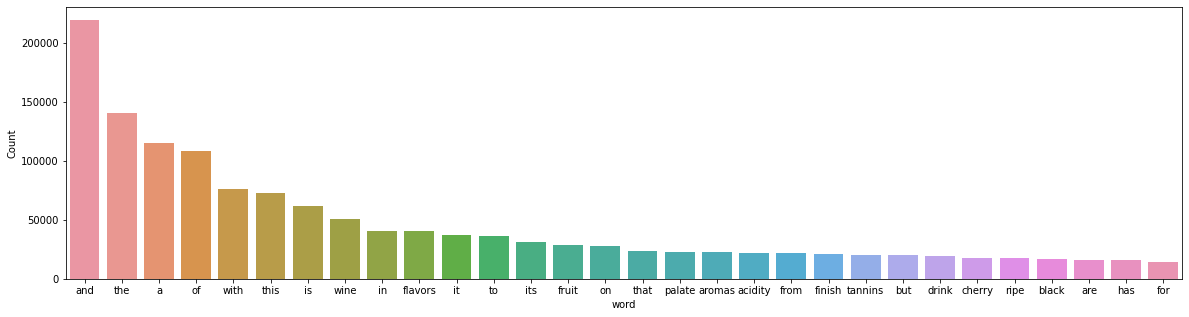

In [0]:
freq_words(reviews['review_description'])

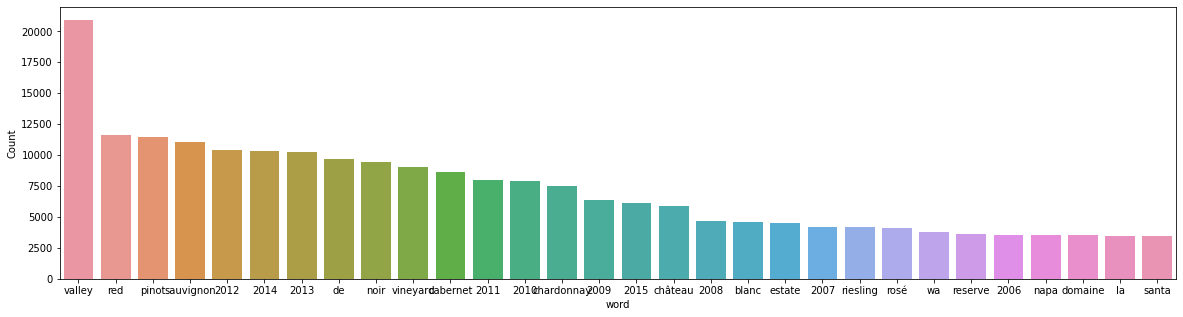

In [0]:
freq_words(reviews['review_title'])

In [0]:
nlp = spacy.load('en_core_web_sm')

In [0]:
# tokenization using spaCy
def tokenization(x):
    reviews_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        reviews_tokens.append(temp)
    
    return reviews_tokens

In [0]:
reviews['tokenized_review'] = tokenization(reviews['review_description'])

100%|██████████| 82657/82657 [18:21<00:00, 75.01it/s]


In [0]:
reviews['tokenized_review'][0]

['classic',
 'chardonnay',
 'aromas',
 'of',
 'apple',
 'pear',
 'and',
 'hay',
 'lead',
 'into',
 'a',
 'palate',
 'marked',
 'by',
 'decent',
 'intensity',
 'but',
 'also',
 'a',
 'bit',
 'of',
 'sweetness',
 'orange',
 'and',
 'candy',
 'notes',
 'run',
 'through',
 'the',
 'rather',
 'short',
 'finish']

In [0]:
# function to remove stopwords
def strip_stopwords(reviews):
    s = []
    for r in tqdm(reviews):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

In [0]:
reviews['review_description'] = strip_stopwords(reviews['tokenized_review'])

100%|██████████| 82657/82657 [00:02<00:00, 40733.41it/s]


In [0]:
reviews['review_description'][0]

'classic chardonnay aromas apple pear hay lead palate marked decent intensity bit sweetness orange candy notes run short finish'

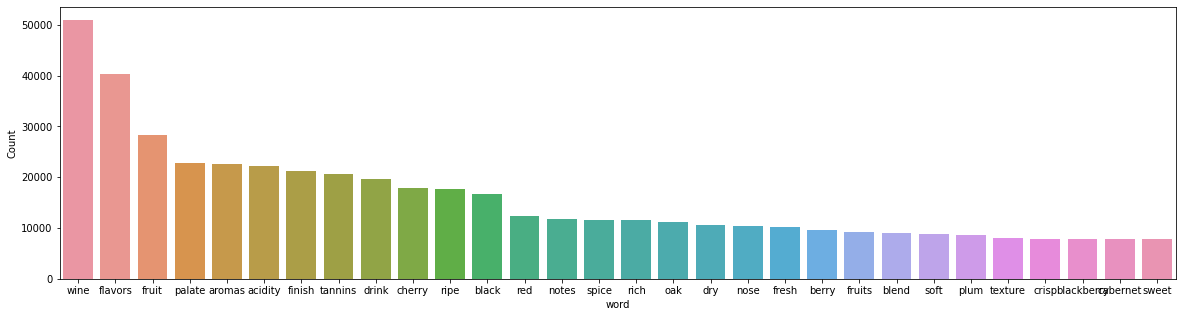

In [0]:
freq_words(reviews['review_description'])

In [0]:
reviews['title_tokenized'] = tokenization(reviews['review_title'])

100%|██████████| 82657/82657 [11:55<00:00, 115.54it/s]


In [0]:
reviews['review_title'] = strip_stopwords(reviews['title_tokenized'])

100%|██████████| 82657/82657 [00:01<00:00, 81385.53it/s]


In [0]:
reviews['review_title'][0]

'andrew peace 2007 peace family vineyard chardonnay south eastern australia'

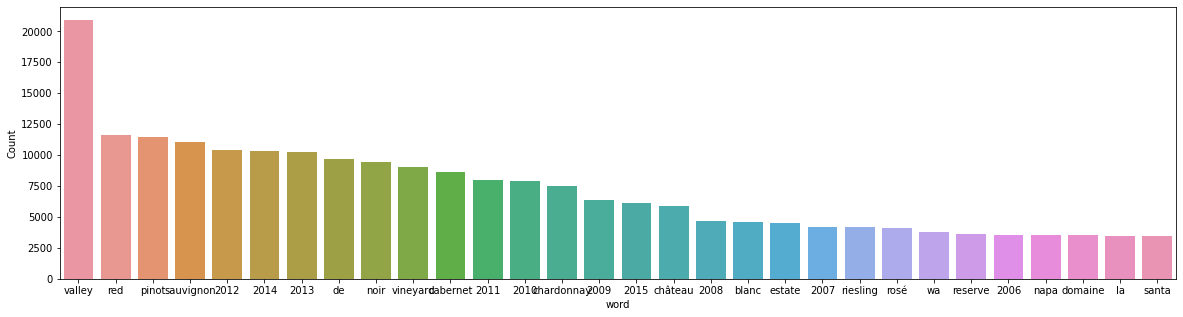

In [0]:
freq_words(reviews['review_title'])

In [0]:
reviews['review'] = reviews['review_title']+reviews['review_description']

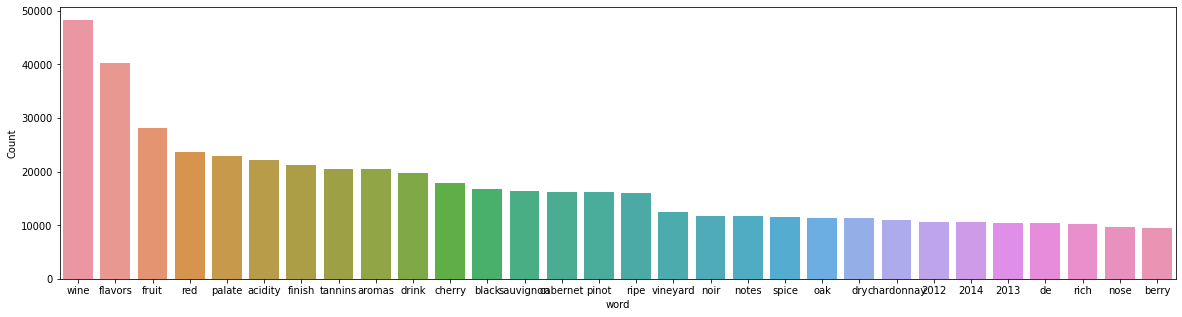

In [0]:
freq_words(reviews['review'])

# model using review_description only

In [0]:
from sklearn.preprocessing import LabelEncoder
encod = LabelEncoder()

In [0]:
Y = encod.fit_transform(reviews['variety'])

In [0]:
encod.classes_

array(['Bordeaux-style Red Blend', 'Bordeaux-style White Blend',
       'Cabernet Franc', 'Cabernet Sauvignon', 'Champagne Blend',
       'Chardonnay', 'Gamay', 'Gewürztraminer', 'Grüner Veltliner',
       'Malbec', 'Merlot', 'Nebbiolo', 'Pinot Grigio', 'Pinot Gris',
       'Pinot Noir', 'Portuguese Red', 'Portuguese White', 'Red Blend',
       'Rhône-style Red Blend', 'Riesling', 'Rosé', 'Sangiovese',
       'Sauvignon Blanc', 'Sparkling Blend', 'Syrah', 'Tempranillo',
       'White Blend', 'Zinfandel'], dtype=object)

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_temp,Y_train,Y_temp = train_test_split(reviews['review_description'],Y,test_size=0.3,random_state=0,stratify=Y)
X_val,X_test,Y_val,Y_test = train_test_split(X_temp,Y_temp,test_size=0.5,random_state=0,stratify=Y_temp)

In [0]:
# build bag-of-words features for train data
 vectorizer = CountVectorizer(binary=False, min_df=1, max_df=0.8, ngram_range=(1,2))
X_train_count = vectorizer.fit_transform(X_train)


In [0]:
# create features for validation and test set
X_val_count = vectorizer.transform(X_val)
X_test_count = vectorizer.transform(X_test)

In [0]:
print('BOW model:> Train features shape:', X_train_count.shape, ' Validation features shape:',X_val_count.shape, 
      ' Test features shape:', X_test_count.shape)

BOW model:> Train features shape: (57859, 487845)  Validation features shape: (12399, 487845)  Test features shape: (12399, 487845)


In [0]:
# Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression(n_jobs=-1)

In [0]:
lr.fit(X_train_count,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
Y_train_pred = lr.predict(X_train_count)
Y_val_pred = lr.predict(X_val_count)
Y_test_pred = lr.predict(X_test_count)

In [0]:
print('Train_accuracy:',accuracy_score(Y_train,Y_train_pred))
print('Val_accuracy:',accuracy_score(Y_val,Y_val_pred))
print('Test_accuracy:',accuracy_score(Y_test,Y_test_pred))

Train_accuracy: 0.9999308664166335
Val_accuracy: 0.7172352609081377
Test_accuracy: 0.7166706992499395


model has highly overfitted

In [0]:
lr_reg = LogisticRegression(n_jobs=-1,C=0.4)

In [0]:
lr_reg.fit(X_train_count,Y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
Y_train_pred = lr_reg.predict(X_train_count)
Y_val_pred = lr_reg.predict(X_val_count)
Y_test_pred = lr_reg.predict(X_test_count)

In [0]:
print('Train_accuracy:',accuracy_score(Y_train,Y_train_pred))
print('Val_accuracy:',accuracy_score(Y_val,Y_val_pred))
print('Test_accuracy:',accuracy_score(Y_test,Y_test_pred))

Train_accuracy: 0.8696659119583816
Val_accuracy: 0.6960238728929753
Test_accuracy: 0.6911847729655617


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier(n_jobs=-1)

In [0]:
clf.fit(X_train_count,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
Y_train_pred = clf.predict(X_train_count)
Y_val_pred = clf.predict(X_val_count)
Y_test_pred = clf.predict(X_test_count)

In [0]:
print('Train_accuracy:',accuracy_score(Y_train,Y_train_pred))
print('Val_accuracy:',accuracy_score(Y_val,Y_val_pred))
print('Test_accuracy:',accuracy_score(Y_test,Y_test_pred))

Train_accuracy: 0.9999654332083168
Val_accuracy: 0.6123880958141785
Test_accuracy: 0.6155335107669974


In [0]:
clf2 = RandomForestClassifier(n_estimators=100,max_depth=200,min_samples_split=4,min_samples_leaf=2,random_state=0)

In [0]:
clf2.fit(X_train_count,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
Y_train_pred = clf2.predict(X_train_count)
Y_val_pred = clf2.predict(X_val_count)
Y_test_pred = clf2.predict(X_test_count)

In [0]:
print('Train_accuracy:',accuracy_score(Y_train,Y_train_pred))
print('Val_accuracy:',accuracy_score(Y_val,Y_val_pred))
print('Test_accuracy:',accuracy_score(Y_test,Y_test_pred))

Train_accuracy: 0.6257626298415112
Val_accuracy: 0.5245584321316236
Test_accuracy: 0.5350431486410194


here we can see the models are highly overfitting and upon apllying methods to counter it underfitting is happening, hence we will add the data in review_title column and then test the models

# Model using both review title and description

In [0]:
# combining review_title and review_description_columns
reviews['review'] = reviews['review_title_tokenized']+reviews['tokenized_review']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_temp,Y_train,Y_temp = train_test_split(reviews['review'],Y,test_size=0.3,random_state=0,stratify=Y)
X_val,X_test,Y_val,Y_test = train_test_split(X_temp,Y_temp,test_size=0.5,random_state=0,stratify=Y_temp)

In [0]:
# build bag-of-words features for train data
 vectorizer = CountVectorizer(binary=False, min_df=1, max_df=0.8, ngram_range=(1,2))
X_train_count = vectorizer.fit_transform(X_train)


In [0]:
# create features for validation and test set
X_val_count = vectorizer.transform(X_val)


X_test_count = vectorizer.transform(X_test)


In [0]:
print('BOW model:> Train features shape:', X_train_count.shape, ' Validation features shape:',X_val_count.shape, 
      ' Test features shape:', X_test_count.shape)

BOW model:> Train features shape: (57859, 546714)  Validation features shape: (12399, 546714)  Test features shape: (12399, 546714)


In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

In [0]:
lr.fit(X_train_count,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
Y_train_pred = lr.predict(X_train_count)
Y_val_pred = lr.predict(X_val_count)
Y_test_pred = lr.predict(X_test_count)

In [0]:
print('Train_accuracy:',accuracy_score(Y_train,Y_train_pred))
print('Val_accuracy:',accuracy_score(Y_val,Y_val_pred))
print('Test_accuracy:',accuracy_score(Y_test,Y_test_pred))

Train_accuracy: 1.0
Val_accuracy: 0.9644326155335108
Test_accuracy: 0.965803693846278


here we can see the performance of model on both train and validation data is almost same, adding the data of review_title has highly improved the model performance

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier()

In [0]:
clf.fit(X_train_count,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
Y_train_pred = clf.predict(X_train_count)
Y_val_pred = clf.predict(X_val_count)
Y_test_pred = clf.predict(X_test_count)

In [0]:
print('Train_accuracy:',accuracy_score(Y_train,Y_train_pred))
print('Val_accuracy:',accuracy_score(Y_val,Y_val_pred))
print('Test_accuracy:',accuracy_score(Y_test,Y_test_pred))

Train_accuracy: 1.0
Val_accuracy: 0.8984595531897733
Test_accuracy: 0.9016856198080491


the performance of random forest on validation data is worse as compared to the logistic regression model, hence we will choose logisticRegression as our final model

# Predicting on the test-set

In [0]:
test_data = pd.read_csv('/content/Knight ML Assignment/Data/test.csv')

In [0]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20665 entries, 0 to 20664
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_name           15927 non-null  object 
 1   country             20661 non-null  object 
 2   review_title        20665 non-null  object 
 3   review_description  20665 non-null  object 
 4   designation         14676 non-null  object 
 5   points              20665 non-null  int64  
 6   price               19271 non-null  float64
 7   province            20661 non-null  object 
 8   region_1            17351 non-null  object 
 9   region_2            8914 non-null   object 
 10  winery              20665 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 1.7+ MB


In [0]:
reviews_test['review_title'] = reviews_test['review_title'].astype('str')

In [0]:
reviews_test['review_description'] = reviews_test['review_description'].astype('str')

In [0]:
reviews_test = test_data[['review_title','review_description']]

In [0]:
reviews_test['review_title'] = clean_text(reviews_test['review_title'])

In [0]:
reviews_test['review_description'] = clean_text(reviews_test['review_description'])

In [0]:
reviews_test['review_title_tokenized'] = tokenization(reviews_test['review_title'])

100%|██████████| 20665/20665 [02:59<00:00, 115.05it/s]


In [0]:
reviews_test['review_title_tokenized'][0]

['boedecker',
 'cellars',
 '2011',
 'athena',
 'pinot',
 'noir',
 'willamette',
 'valley']

In [0]:
reviews_test['tokenized_review'] = tokenization(reviews_test['review_description'])

100%|██████████| 20665/20665 [04:33<00:00, 75.69it/s]


In [0]:
reviews_test['review'] = reviews_test['tokenized_review']+ reviews_test['review_title_tokenized']

In [0]:
reviews_test['review']=reviews_test['review'].astype('str')

In [0]:
X = vectorizer.transform(reviews_test['review'])

In [0]:
test_pred = lr.predict(X)

In [0]:
test_predict = encod.inverse_transform(test_pred)

In [0]:
test_predict.shape

(20665,)

In [0]:
test_predict[:10]

array(['Pinot Noir', 'Malbec', 'Chardonnay', 'Malbec', 'Sangiovese',
       'White Blend', 'Bordeaux-style Red Blend', 'Cabernet Sauvignon',
       'Red Blend', 'Sparkling Blend'], dtype=object)

In [0]:
test_data['variety'] = test_predict

In [0]:
test_data.head()

,user_name,country,review_title,review_description,designation,points,price,province,region_1,region_2,winery,variety
0,@paulgwine,US,Boedecker Cellars 2011 Athena Pinot Noir (Will...,Nicely differentiated from the companion Stewa...,Athena,88,35.0,Oregon,Willamette Valley,Willamette Valley,Boedecker Cellars,Pinot Noir
1,@wineschach,Argentina,Mendoza Vineyards 2012 Gran Reserva by Richard...,"Charred, smoky, herbal aromas of blackberry tr...",Gran Reserva by Richard Bonvin,90,60.0,Mendoza Province,Mendoza,NaN,Mendoza Vineyards,Malbec
2,@vboone,US,Prime 2013 Chardonnay (Coombsville),"Slightly sour and funky in earth, this is a re...",NaN,87,38.0,California,Coombsville,Napa,Prime,Chardonnay
3,@wineschach,Argentina,Bodega Cuarto Dominio 2012 Chento Vineyard Sel...,"This concentrated, midnight-black Malbec deliv...",Chento Vineyard Selection,91,20.0,Mendoza Province,Mendoza,NaN,Bodega Cuarto Dominio,Malbec
4,@kerinokeefe,Italy,SassodiSole 2012 Brunello di Montalcino,"Earthy aromas suggesting grilled porcini, leat...",NaN,90,49.0,Tuscany,Brunello di Montalcino,NaN,SassodiSole,Sangiovese


In [0]:
test_data.to_csv('MLInternshiptest.csv')